<a href="https://colab.research.google.com/github/Kae1thas/ML-24/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_6_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B0_%D1%81%D0%B8%D0%BD%D1%82%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Импорт данных


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification


# Данные

Наши старые друзья / знакомые


In [ ]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

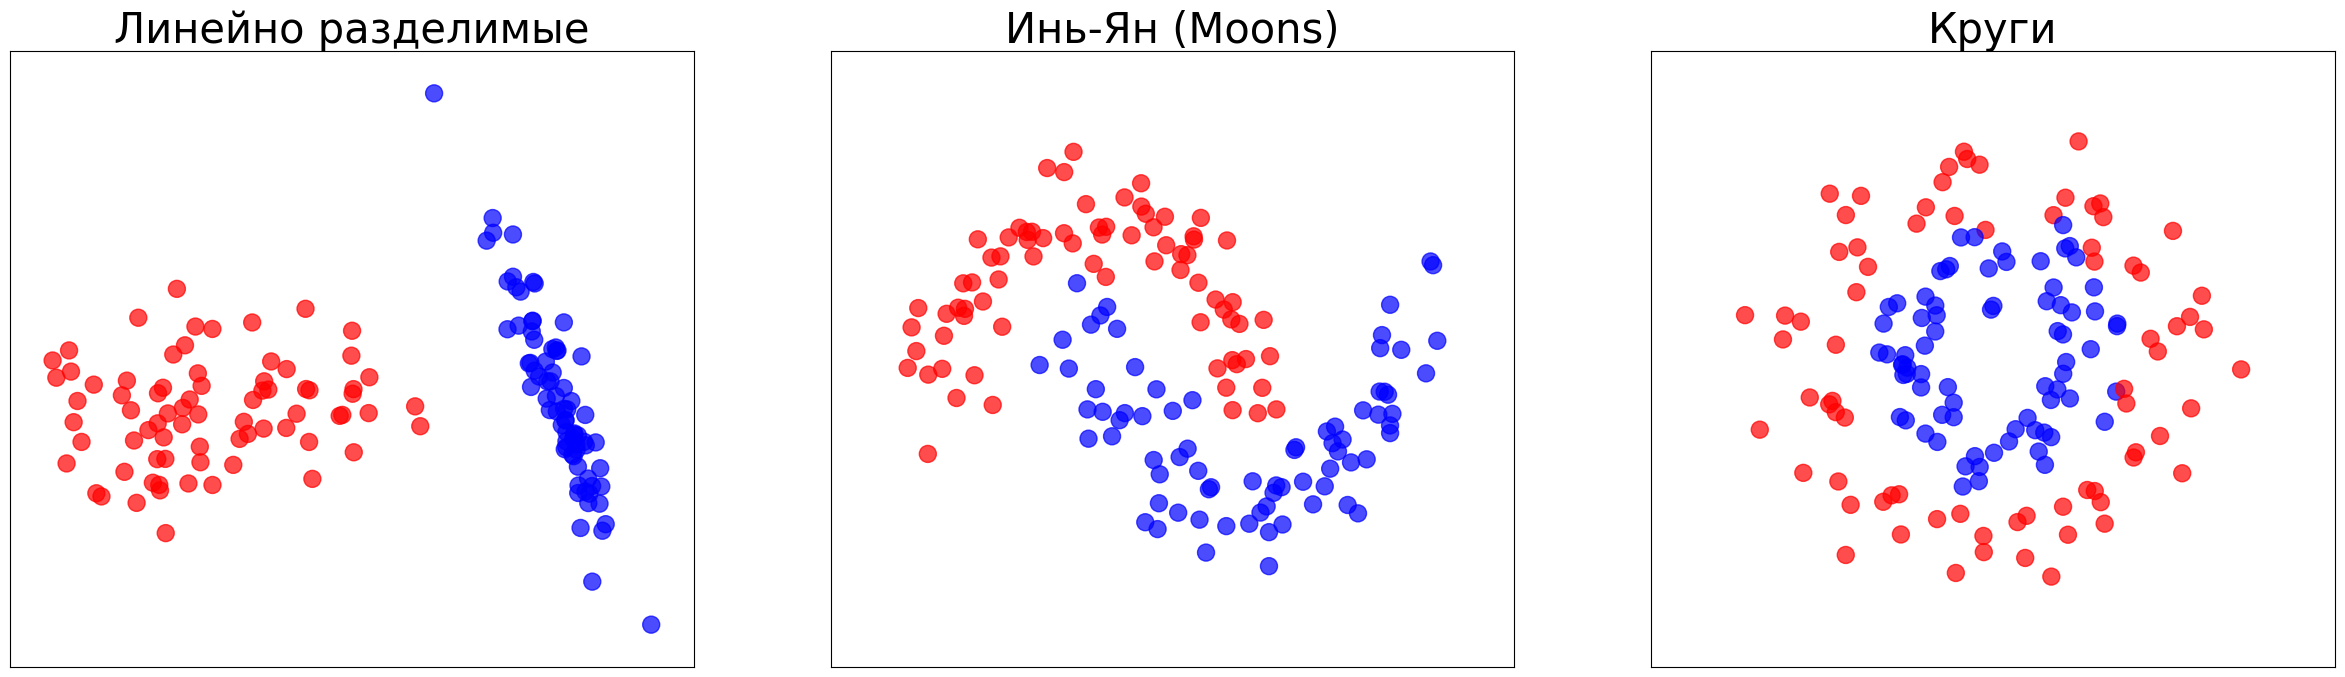

In [ ]:
#@title данные { run: "auto" }
N = 150 #@param {type:"slider", min:50, max:250, step:25}
noises = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}

def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42):

    if random_state: rng = np.random.RandomState(seed = random_state)

    if method == 'line' or method is None:
        X, y = make_classification(n_samples=N, n_features=2,
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=2,
                                   random_state=random_state)
        X += np.random.randn(*X.shape) *noises
        out = (X, y)

    elif method == 'moons':
        X, y = make_moons(n_samples=N, noise=noises,
                          random_state=random_state)

    elif method == 'circles':
        X, y = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )


    return X,y


fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,method = 'line', noises = noises),
          'Линейно разделимые')
ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,method = 'moons', noises = noises),
          'Инь-Ян (Moons)')
ax = plt.subplot(1, 3, 3)
plot_data(ax, make_binary_clf(N,method = 'circles', noises = noises),
          'Круги')




## Кластеризация k-средних

В ряде случаев при анализе данных оказывается так, что про данные ничего не известно, однако хочется понять на сколько они однородны или, например, могут быть разделены на группы. Такие группы можно назвать кластерами. Задача разделения на кластеры не требует наличия учителя. Другими словами, мы пытаемся найти закономерности в данных как таковых без привязки к тому, какие результаты для них мы хотим получить.<br>

 Одним из самых простых методов кластеризации является метод k-средних.
Суть данного метода сводится к тому, чтобы найти заданное число кластеров (k) и их центры (т.н. центроиды) таких, чтобы расстояние от центроидов до всех точек кластера было минимальным.

Алгоритм k-средних может быть описан следующим образом <ul>
<li>выбирается к случайным точкам - центроиды.
<li>рассчитывается вектор расстояние между каждой точкой набора данных и каждым центроидом.
<li>в каждый кластер записываются те точки для которых оказалось, что для соответствующего центроида расстояние меньше, чем для других.
<li>новые значение центроидов рассчитываются как среднее значение по всем точкам кластера.


In [ ]:
X,y = make_binary_clf(N,method = 'line', noises=0.05, )


X.shape

(150, 2)

In [ ]:
X

array([[ 1.87309041,  2.55193689],
       [ 1.31724797,  3.56926392],
       [-2.4462049 ,  2.14225446],
       [-3.91427038,  1.51740918],
       [-3.749235  ,  1.46212691],
       [ 1.60380942,  2.98324073],
       [ 2.33095503,  1.04473441],
       [-2.72087401,  0.96928273],
       [ 2.33241731,  1.07078573],
       [ 1.251713  ,  4.19911598],
       [ 1.68250962,  2.6289984 ],
       [ 1.13208173,  3.98192097],
       [ 0.71605419,  5.57199031],
       [ 1.19405516,  4.15117245],
       [-1.42714314,  2.45570175],
       [ 1.66985568,  2.89305096],
       [-1.01770799,  1.78306631],
       [ 1.48894772,  3.22858148],
       [-0.69152436,  2.64681168],
       [ 2.35850317,  1.03226468],
       [ 2.28810721,  1.03383154],
       [ 1.85715413,  2.50507817],
       [ 1.97116266,  2.35173329],
       [ 2.16176669,  1.44499899],
       [ 2.66624706,  0.43409147],
       [-2.56772817,  0.18309052],
       [-3.83639662,  2.47508573],
       [-2.2587482 ,  1.27814203],
       [ 2.12936385,

Рассчитаем расстояние как сумму разностей квадратов.

In [ ]:
def distance(X1, X2, metric = 'euclidean', p = 2):
    if metric == 'euclidean':
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        dist = np.max(np.abs(X1 - X2).T,axis=0)
    if metric == 'Minkowski':
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)
    return dist

Проведем несколько тестов, функция работает как с векторами, так и матрицами равной размерности.

In [ ]:
X[:5]

array([[ 1.87309041,  2.55193689],
       [ 1.31724797,  3.56926392],
       [-2.4462049 ,  2.14225446],
       [-3.91427038,  1.51740918],
       [-3.749235  ,  1.46212691]])

In [ ]:
X[10:15]

array([[ 1.68250962,  2.6289984 ],
       [ 1.13208173,  3.98192097],
       [ 0.71605419,  5.57199031],
       [ 1.19405516,  4.15117245],
       [-1.42714314,  2.45570175]])

In [ ]:
print(distance(X[0], X[1],metric = 'cityblock'))
print(distance(X[:5], X[10:15]))
print(distance(X[0], X[10:15]))

1.5731694709547006
[0.20557119 0.45229679 4.66507991 5.747321   2.52572793]
[0.20557119 1.61057392 3.23410814 1.73742432 3.30163637]


In [ ]:
metrics = ['euclidean','cityblock','Chebyshev','Minkowski']

In [ ]:
for metric in metrics:
    print(distance(X[0], X[1],metric = metric, p = 10))

1.1592735233919305
1.5731694709547006
1.017327026643918
1.0175679666541966


Прежде чем проводить кластеризацию необходимо проинициализировать калстеры.<br>
Для этого выберем случайные индексы среди доступных в наборе данных.

In [ ]:
def init_centroids(X, n_clusters, random_state = 42):
    if random_state: rng = np.random.seed(random_state)
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:]


посмотрим как это работает для двух кластеров

In [ ]:
n_clusters = 2
centroids = init_centroids(X, n_clusters)
print(centroids)

[[-2.44878633  2.23192517]
 [ 1.7668319   2.42728258]]


Проведем первую кластеризацию. Для этого возьмем каждый центроид и посчитаем расстояние от него до все записей набора данных. <br>
Индексы значений для каждого кластера выберем как индексы минимальных расстояний до соответствующего центроида. <br>
Таким образом, нулевой кластер будет включать те точки набора данных, в которых расстояние до нулевого центроида меньше, чем до первого центроида.

In [ ]:
def predict(X, n_clusters, centroids, metric = 'euclidean', p = 2):
    distances = np.zeros((X.shape[0], n_clusters))

    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X, metric, p)

    cluster_label = np.argmin(distances,axis = 1)
    return cluster_label, distances

посмотрим как распределились результаты кластеризации

Для этого бахнем функцию (чтобы не повторятся)

In [ ]:
def plot_cluster(X,centroids, cluster_label, centroids_label, old_centroids = None, old_centroids_label = None):

    fig = plt.figure(figsize=(11,10))

    plt.scatter(X[:, 0], X[:, 1],
                c = cluster_label, cmap = 'bwr',
                s=100,alpha = 0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c = centroids_label, cmap = 'bwr',
                s=400, edgecolors = 'k')

    if old_centroids is not None:
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
            c = old_centroids_label, cmap = 'bwr',
            s=200, edgecolors = 'k')

    plt.xticks([])
    plt.yticks([])

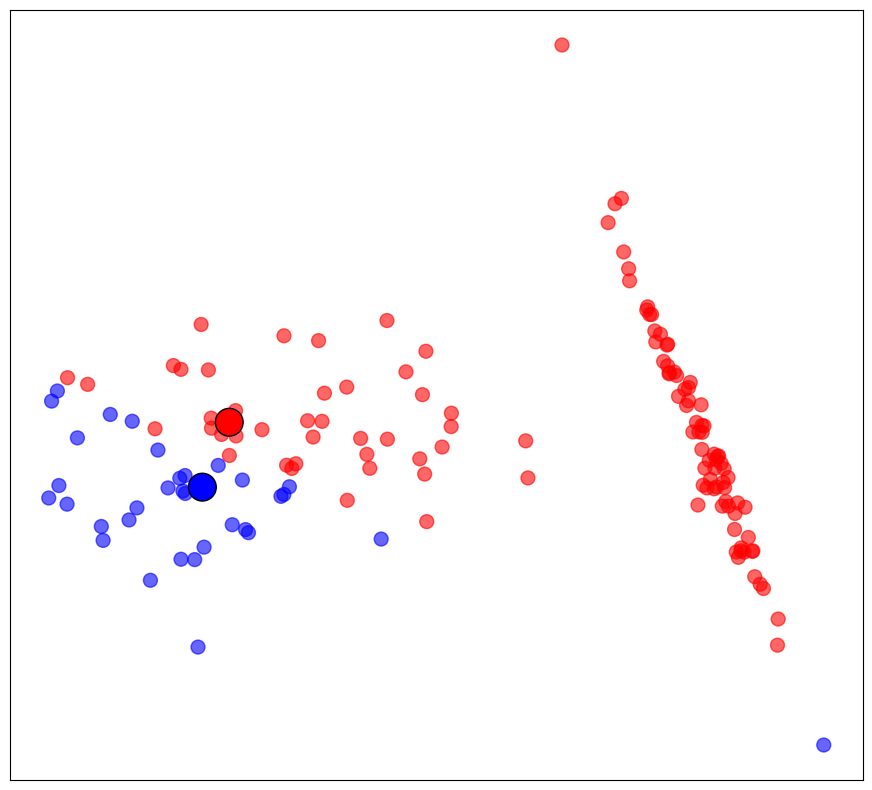

In [ ]:
centroids = init_centroids(X, n_clusters, random_state=32)

cluster_label, distances=predict(X, n_clusters, centroids)
centroids_label = [0,1]

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

Теперь выберем новые центроиды, для этого нам понадобиться выбрать каждый кластер по отдельности

In [ ]:
old_centroids = np.copy(centroids)

for k in range(n_clusters):
    c_idxs = np.flatnonzero(cluster_label==k)
    centroids[k] = X[c_idxs].mean(axis = 0)

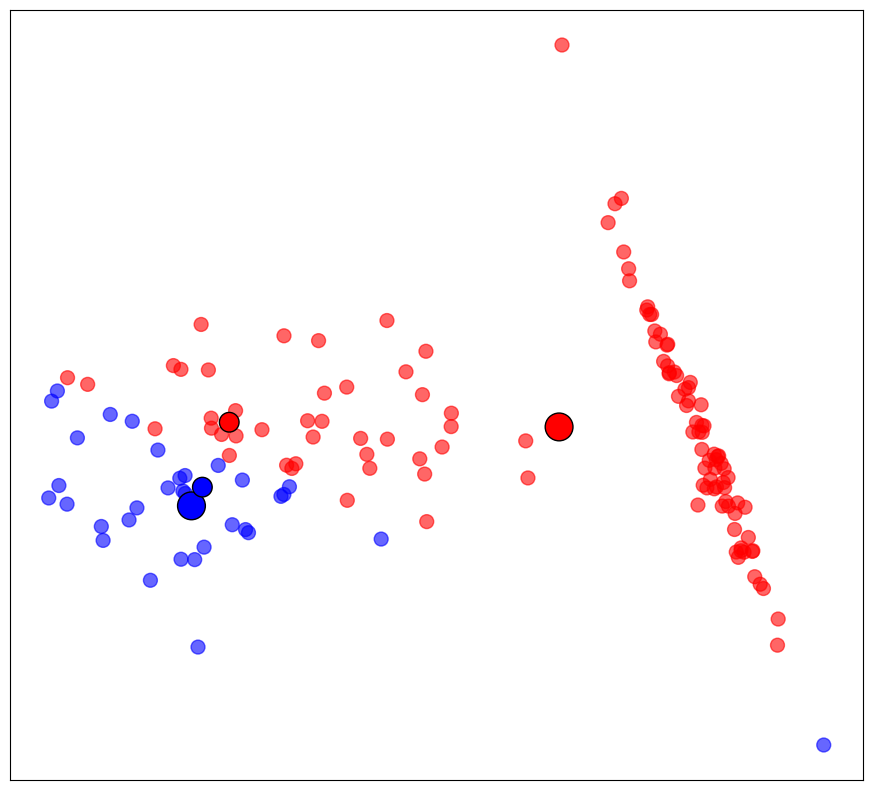

In [ ]:
plot_cluster(X,centroids,
             cluster_label, centroids_label,
             old_centroids, centroids_label)

Рассчитаем относительное расстояние между старыми и новыми центроидами. Если расстояние между обновленными центроидами будет сравнительно небольшим - то есть центроиды перестанут менять позицию, то мы будем считать что кластеризация закончена.

In [ ]:
def delta_centroids(centroids,old_centroids, metric = 'euclidean', p = 2):
    return (distance(centroids,old_centroids, metric, p)/distance(old_centroids, np.mean(old_centroids), metric, p)).mean()

delta_centroids(centroids,old_centroids)

0.5005851473851651

Попробуем создать процедуры итерационной кластеризации. В кноце процедуры выведем результирующий номер итерации и расстояние между кластерами

In [ ]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01, metric = 'euclidean', p = 2):

    dcentr = np.inf

    for i in range(max_iter):

        old_centroids = np.copy(centroids)
        cluster_label,_=predict(X, n_clusters, centroids, metric, p)

        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)

        dcentr = delta_centroids(centroids,old_centroids, metric, p)

        if dcentr<=tol:
            break

    print('Мы остановились на итерации:', i,', относительное изменение центроидов: ',dcentr)

    return cluster_label

проверим и визуализируем результаты:

In [ ]:
cluster_label = fit(X, n_clusters, centroids, max_iter=100, tol=0.001)

Мы остановились на итерации: 3 , относительное изменение центроидов:  0.0


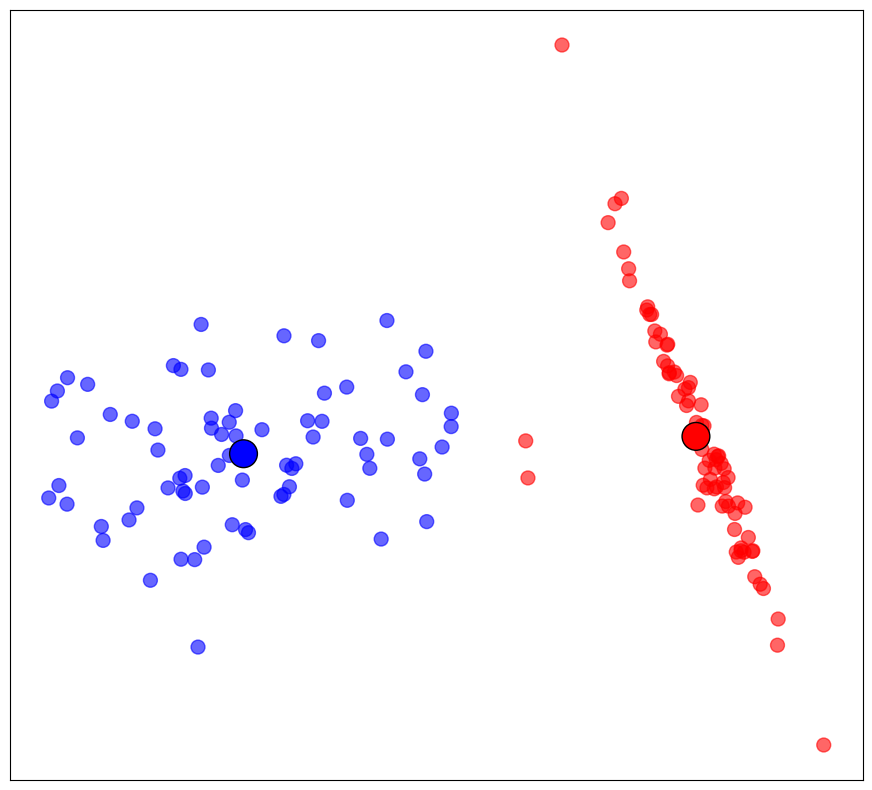

In [ ]:

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

# ООП

Теперь объеденим все наши наработки в один класс.

In [ ]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None,
                 max_iter=10, tol=0.01,
                 metric = 'euclidean', p = 2,
                 random_state = None):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter
        self.tol        = tol
        self.iters      = None
        self.inertia = None
        self.metric = metric
        self.p  = p
        self.random_state  = random_state
    #-------------------------------------
    def distance(self,X1, X2):
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2),self.p).T,axis=0),1/self.p)
        return dist
    #-------------------------------------
    def init_centroids(self, X):
        if self.random_state: rng = np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)
        self.inertia = np.sum(np.power(np.min(distances,axis = 1),2))
        return np.argmin(distances,axis = 1)
    #-------------------------------------
    def transform(self,X):
        return self.predict(X)
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        return (
                distance(self.centroids,old_centroids)/
                distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):

        if self.centroids is None:
            self.centroids = self.init_centroids(X)

        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)

            cluster_label = self.predict(X)

            for k in range(self.n_clusters):

                c_idxs = np.flatnonzero(cluster_label==k)

                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self
    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)



Посмотрим метод локтя

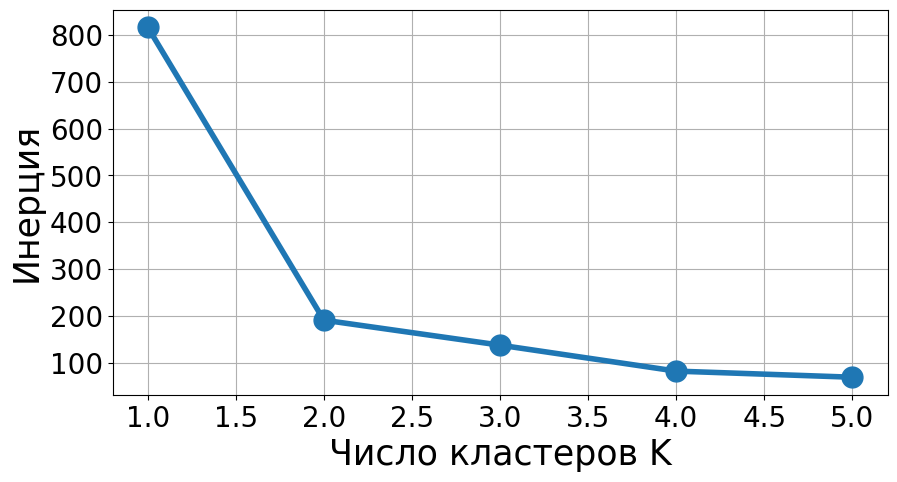

In [ ]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

Посмотрим для 2 кластеров

Мы остановились на итерации:: 2


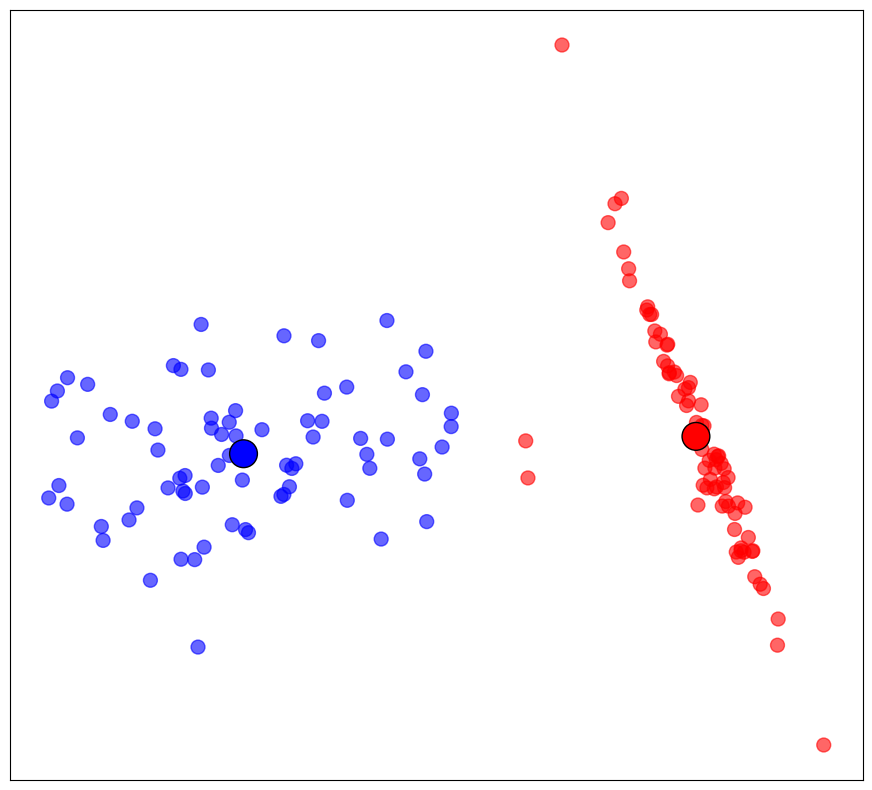

In [ ]:
kmeans   = KMeans(n_clusters=2,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)

Посмотрим для 4 кластеров

Мы остановились на итерации:: 3


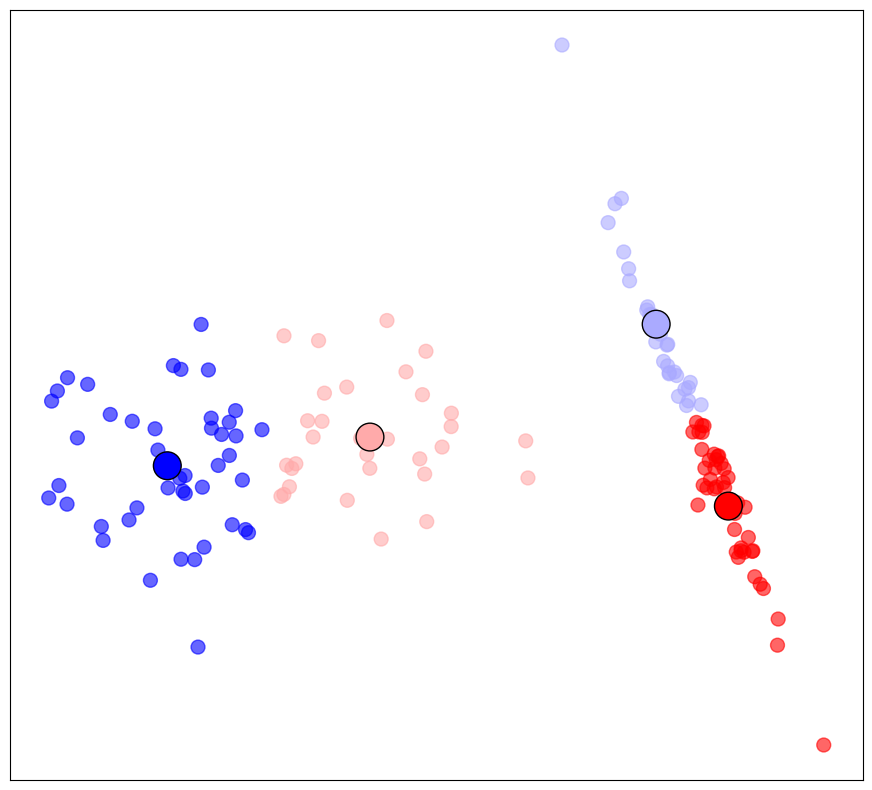

In [ ]:
kmeans   = KMeans(n_clusters=4,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)

Немного о метриках

In [ ]:
pd.crosstab(y,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2,3
Метки,,,,
0,44,0,31,0
1,0,29,0,46


**Практические задания**

1
Сгенерируйте линейно разделимые данные с другими параметрами и проверьте, как работает алгоритм кластеризации k-cредних на этих данных. Оцените оптимальное число кластеров по методу локтя.

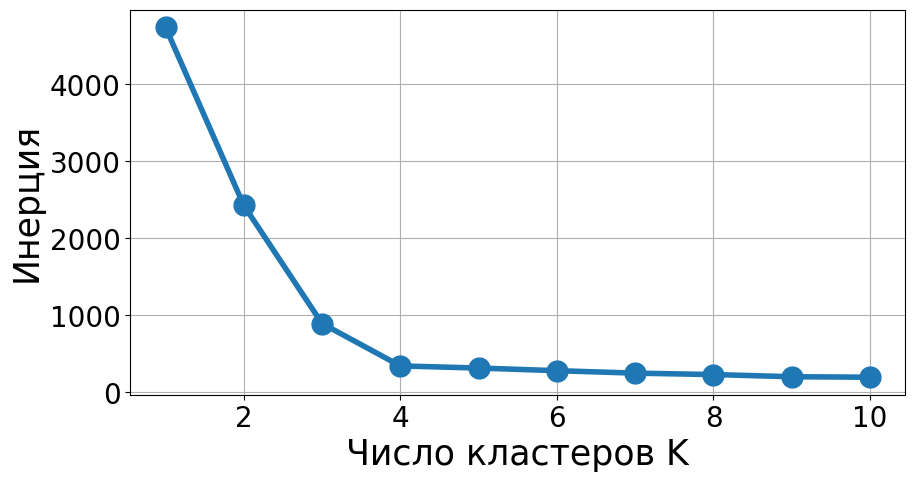

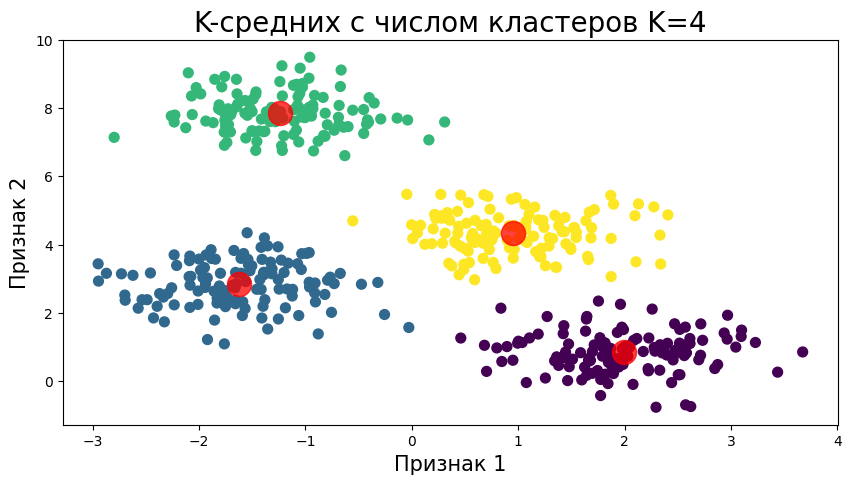

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Шаг 1: Генерация линейно разделимых данных
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Шаг 2: Применение алгоритма K-средних и метод локтя
sse = []  # Сумма квадратов расстояний до центроидов
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

# Шаг 3: Визуализация метода локтя
plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o', linewidth=4, markersize=15)
plt.xlabel('Число кластеров K', fontsize=25)
plt.ylabel('Инерция', fontsize=25)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Шаг 4: Визуализация кластеров с оптимальным числом кластеров (например, K=4)
optimal_k = 4
km_optimal = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans = km_optimal.fit_predict(X)

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75)
plt.xlabel('Признак 1', fontsize=15)
plt.ylabel('Признак 2', fontsize=15)
plt.title(f'K-средних с числом кластеров K={optimal_k}', fontsize=20)
plt.show()


2 Сгенерируйте данные, распределенные как знак инь-ян или концентрические круги, и проверьте, как работает алгоритм кластеризации k-cредних на этих данных. Оцените оптимальное число кластеров по методу локтя.

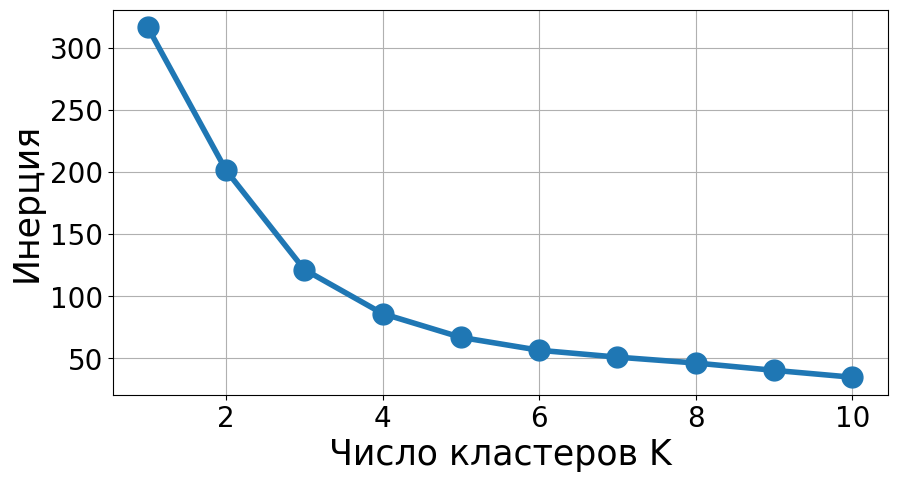

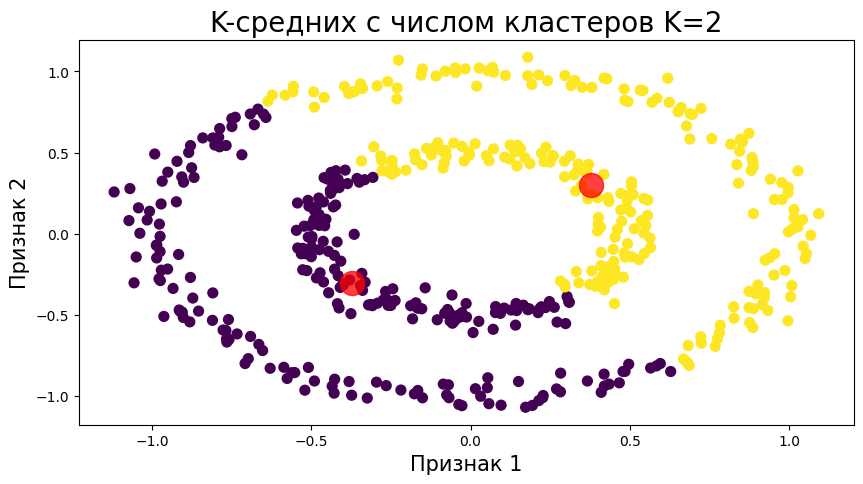

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles

# Шаг 1: Генерация данных в форме концентрических кругов
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=0)

# Шаг 2: Применение алгоритма K-средних и метод локтя
sse = []  # Сумма квадратов расстояний до центроидов
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

# Шаг 3: Визуализация метода локтя
plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o', linewidth=4, markersize=15)
plt.xlabel('Число кластеров K', fontsize=25)
plt.ylabel('Инерция', fontsize=25)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Шаг 4: Визуализация кластеров с оптимальным числом кластеров (например, K=2)
optimal_k = 2
km_optimal = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans = km_optimal.fit_predict(X)

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75)
plt.xlabel('Признак 1', fontsize=15)
plt.ylabel('Признак 2', fontsize=15)
plt.title(f'K-средних с числом кластеров K={optimal_k}', fontsize=20)
plt.show()


3. Загрузите данные MNIST. Уменьшите размерность данных с использованием метода главных компонент. Примените кластеризацию k-cредних. Оцените оптимальное число кластеров по методу локтя и связь кластеров с цифрами на изображениях.

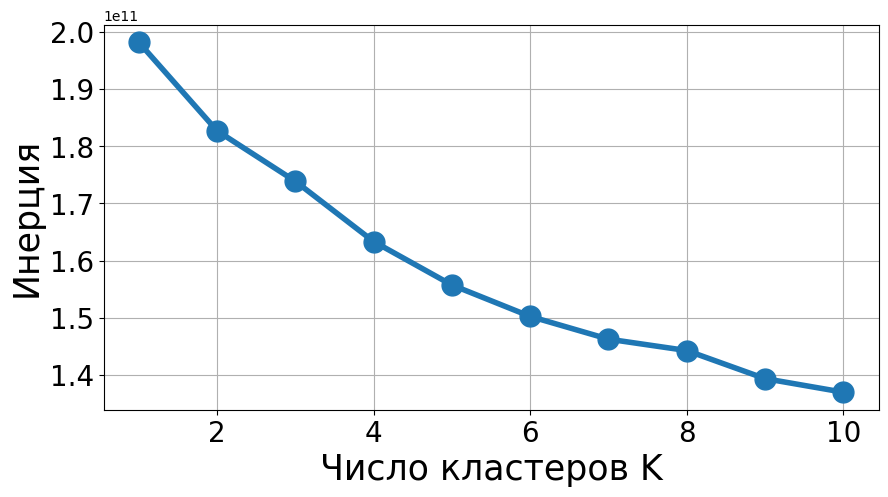

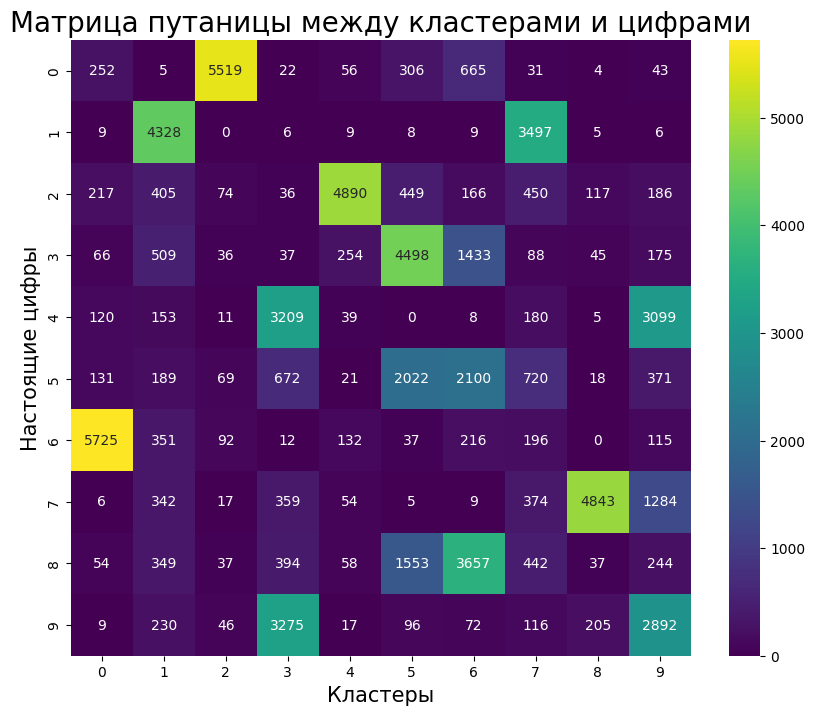

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Шаг 1: Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)

# Шаг 2: Уменьшение размерности данных с помощью PCA
pca = PCA(n_components=50, random_state=0)  # Оставляем 50 главных компонент
X_pca = pca.fit_transform(X)

# Шаг 3: Применение алгоритма K-средних и метод локтя
sse = []
list_k = list(range(1, 11))

for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o', linewidth=4, markersize=15)
plt.xlabel('Число кластеров K', fontsize=25)
plt.ylabel('Инерция', fontsize=25)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Шаг 4: Применение K-средних для оптимального числа кластеров (например, K=10)
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

# Шаг 5: Оценка кластеров и их связи с цифрами
conf_mat = confusion_matrix(y, y_kmeans)

# Визуализация матрицы путаницы
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Кластеры', fontsize=15)
plt.ylabel('Настоящие цифры', fontsize=15)
plt.title('Матрица путаницы между кластерами и цифрами', fontsize=20)
plt.show()


Выполните кластеризацию для набора данных Cars:

• выполните кластеризацию для числовых признаков: используйте все числовые признаки, выполнив визуализацию в разных двумерных проекциях;

• оцените оптимальное число кластеров по методу локтя;

• оцените связь кластеров с категориальными признаками;

• сравните результаты модели при использовании данных
с применением метода главных компонент.

Saving cars.csv to cars (3).csv


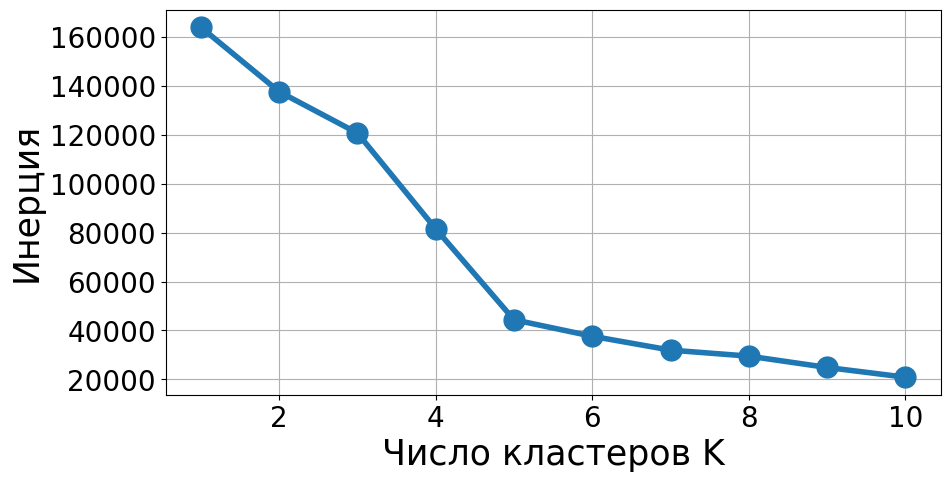

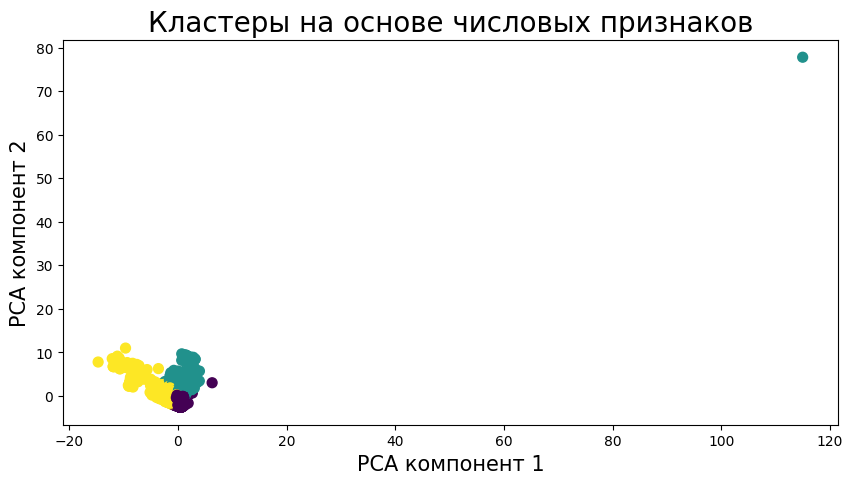

Соотношение кластеров с категорией 'Make':
 col_0              0         1         2
Make                                    
ARO         0.000000  0.000000  1.000000
Abarth      1.000000  0.000000  0.000000
Acura       0.611111  0.388889  0.000000
Alfa Romeo  0.510638  0.106383  0.382979
Alta marca  0.444444  0.222222  0.333333
...              ...       ...       ...
Volkswagen  0.609433  0.060177  0.330390
Volvo       0.465616  0.418338  0.116046
Xpeng       1.000000  0.000000  0.000000
Zaz         0.000000  0.000000  1.000000
Zotye       1.000000  0.000000  0.000000

[87 rows x 3 columns] 

Соотношение кластеров с категорией 'Model':
 col_0            0    1         2
Model                            
1 Series  0.978723  0.0  0.021277
100       0.000000  0.0  1.000000
1007      1.000000  0.0  0.000000
106       0.000000  0.0  1.000000
107       1.000000  0.0  0.000000
...            ...  ...       ...
ix20      1.000000  0.0  0.000000
ix35      1.000000  0.0  0.000000
on-DO     1.0

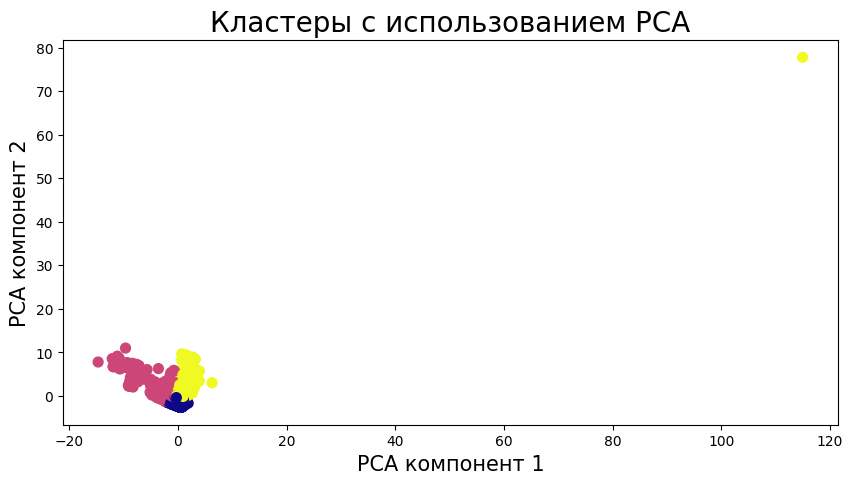

Распределение кластеров без PCA: [26566  5841  8600]
Распределение кластеров с PCA: [19619  7445 13943]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Шаг 1: Загрузка файла CSV
uploaded = files.upload()  # Это откроет диалог для загрузки файла
# После загрузки файла прочитайте его
df = pd.read_csv(list(uploaded.keys())[0])

# Шаг 2: Предварительная обработка данных
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
X = df[numerical_cols].dropna()

# Нормализация числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Шаг 3: Применение K-средних и метод локтя
sse = []
list_k = list(range(1, 11))

for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o', linewidth=4, markersize=15)
plt.xlabel('Число кластеров K', fontsize=25)
plt.ylabel('Инерция', fontsize=25)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Шаг 4: Визуализация кластеров с оптимальным числом кластеров (например, K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Визуализация данных в двумерных проекциях (PCA для проекции)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('Кластеры на основе числовых признаков', fontsize=20)
plt.xlabel('PCA компонент 1', fontsize=15)
plt.ylabel('PCA компонент 2', fontsize=15)
plt.show()

# Шаг 5: Оценка связи кластеров с категориальными признаками
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], y_kmeans, normalize='index')
    print(f"Соотношение кластеров с категорией '{col}':\n", cross_tab, "\n")

# Шаг 6: Кластеризация с использованием PCA
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca_full)

plt.figure(figsize=(10, 5))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=y_kmeans_pca, s=50, cmap='plasma')
plt.title('Кластеры с использованием PCA', fontsize=20)
plt.xlabel('PCA компонент 1', fontsize=15)
plt.ylabel('PCA компонент 2', fontsize=15)
plt.show()

# Сравнение кластеров после применения PCA и без
print("Распределение кластеров без PCA:", np.bincount(y_kmeans))
print("Распределение кластеров с PCA:", np.bincount(y_kmeans_pca))


Сравните работу реализованных алгоритмов с функциями библиотеки scikit-learn — кластеризацией k-cредних sklearn.
cluster.KMeans.

Saving cars.csv to cars (4).csv
Время выполнения KMeans (sklearn): 0.5267806053161621 секунд


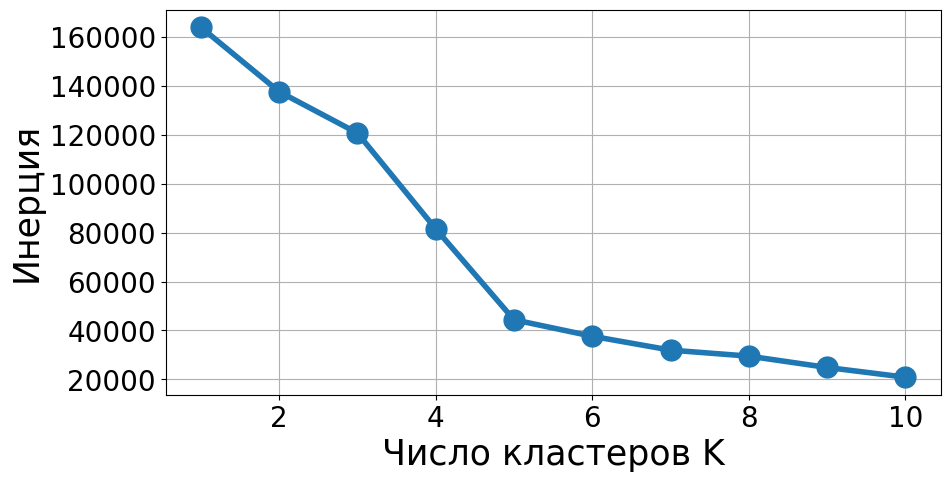

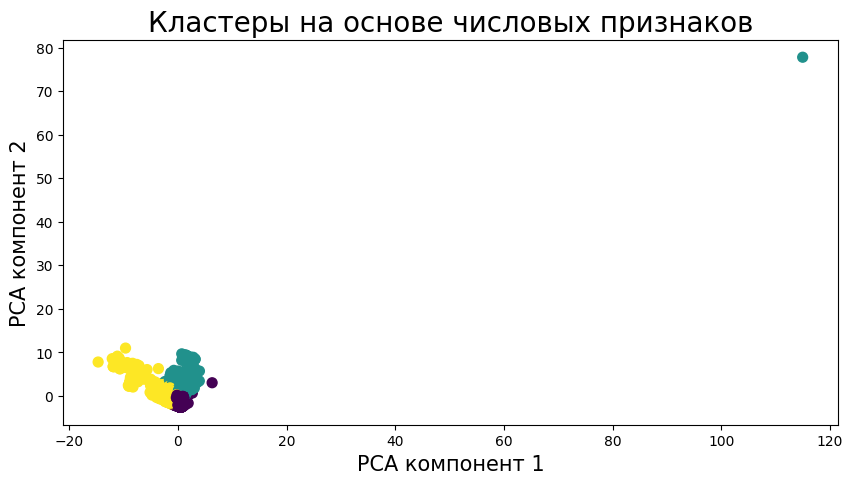

Соотношение кластеров с категорией 'Make':
 col_0              0         1         2
Make                                    
ARO         0.000000  0.000000  1.000000
Abarth      1.000000  0.000000  0.000000
Acura       0.611111  0.388889  0.000000
Alfa Romeo  0.510638  0.106383  0.382979
Alta marca  0.444444  0.222222  0.333333
...              ...       ...       ...
Volkswagen  0.609433  0.060177  0.330390
Volvo       0.465616  0.418338  0.116046
Xpeng       1.000000  0.000000  0.000000
Zaz         0.000000  0.000000  1.000000
Zotye       1.000000  0.000000  0.000000

[87 rows x 3 columns] 

Соотношение кластеров с категорией 'Model':
 col_0            0    1         2
Model                            
1 Series  0.978723  0.0  0.021277
100       0.000000  0.0  1.000000
1007      1.000000  0.0  0.000000
106       0.000000  0.0  1.000000
107       1.000000  0.0  0.000000
...            ...  ...       ...
ix20      1.000000  0.0  0.000000
ix35      1.000000  0.0  0.000000
on-DO     1.0

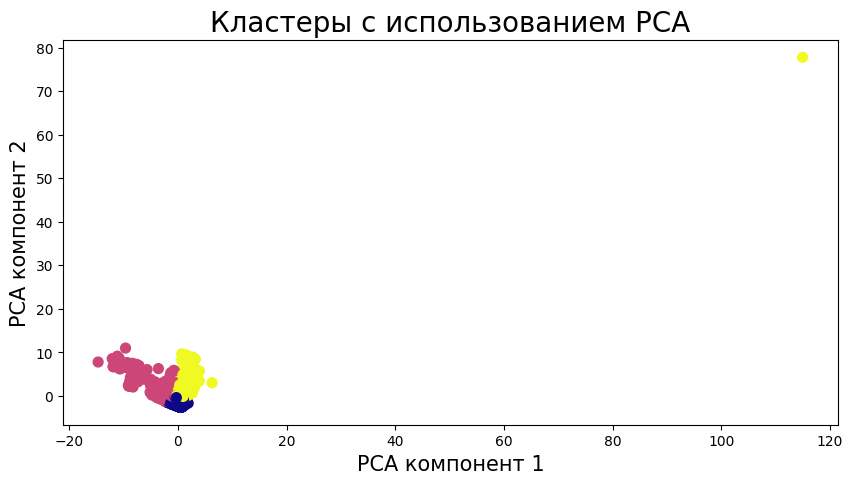

Распределение кластеров без PCA: [26566  5841  8600]
Распределение кластеров с PCA: [19619  7445 13943]
Время выполнения KMeans с PCA: 0.059760332107543945 секунд


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files
import time

# Шаг 1: Загрузка файла CSV
uploaded = files.upload()  # Это откроет диалог для загрузки файла
# После загрузки файла прочитайте его
df = pd.read_csv(list(uploaded.keys())[0])

# Шаг 2: Предварительная обработка данных
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
X = df[numerical_cols].dropna()

# Нормализация числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Шаг 3: Применение K-средних и метод локтя (sklearn)
sse = []
list_k = list(range(1, 11))

start_time = time.time()  # Оценка времени работы
for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

end_time = time.time()  # Конец измерения времени
print(f"Время выполнения KMeans (sklearn): {end_time - start_time} секунд")

# Визуализация метода локтя
plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o', linewidth=4, markersize=15)
plt.xlabel('Число кластеров K', fontsize=25)
plt.ylabel('Инерция', fontsize=25)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Шаг 4: Визуализация кластеров с оптимальным числом кластеров (например, K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Визуализация данных в двумерных проекциях (PCA для проекции)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('Кластеры на основе числовых признаков', fontsize=20)
plt.xlabel('PCA компонент 1', fontsize=15)
plt.ylabel('PCA компонент 2', fontsize=15)
plt.show()

# Шаг 5: Оценка связи кластеров с категориальными признаками
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], y_kmeans, normalize='index')
    print(f"Соотношение кластеров с категорией '{col}':\n", cross_tab, "\n")

# Шаг 6: Кластеризация с использованием PCA
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca_full)

plt.figure(figsize=(10, 5))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=y_kmeans_pca, s=50, cmap='plasma')
plt.title('Кластеры с использованием PCA', fontsize=20)
plt.xlabel('PCA компонент 1', fontsize=15)
plt.ylabel('PCA компонент 2', fontsize=15)
plt.show()

# Сравнение кластеров после применения PCA и без
print("Распределение кластеров без PCA:", np.bincount(y_kmeans))
print("Распределение кластеров с PCA:", np.bincount(y_kmeans_pca))

# Оценка времени выполнения для кластеризации с PCA
start_time_pca = time.time()
kmeans_pca.fit(X_pca_full)
end_time_pca = time.time()

print(f"Время выполнения KMeans с PCA: {end_time_pca - start_time_pca} секунд")
